In [ ]:
#import dtw
import scanpy as sc
import numpy as np
import scanpy.external as sce
import pandas as pd
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import sys
import symphonypy as sp
import palantir
import scFates as scf

%matplotlib inline

import sclitr as sl

# Pathes
#DATA_PATH = "/home/julia/data"
#HOME_PATH = "/home/julia/data"


#import mmbench as mb

import warnings
warnings.filterwarnings("ignore")

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sc.set_figure_params(dpi=150, dpi_save=300)
sns.set_style("ticks")

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr, pearsonr
from tqdm import tqdm

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


In [ ]:
#adata1.write('/home/julia/data/placodes/ascidias_notebooks/h5ad/7_11_full_umap_ascidias.h5ad')
adata1=sc.read('/home/julia/data/placodes/ascidias_notebooks/h5ad/7_11_full_umap_ascidias.h5ad')

In [ ]:
adata1

AnnData object with n_obs × n_vars = 68263 × 15094
    obs: 'plate', 'day', 'stage', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'stage_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

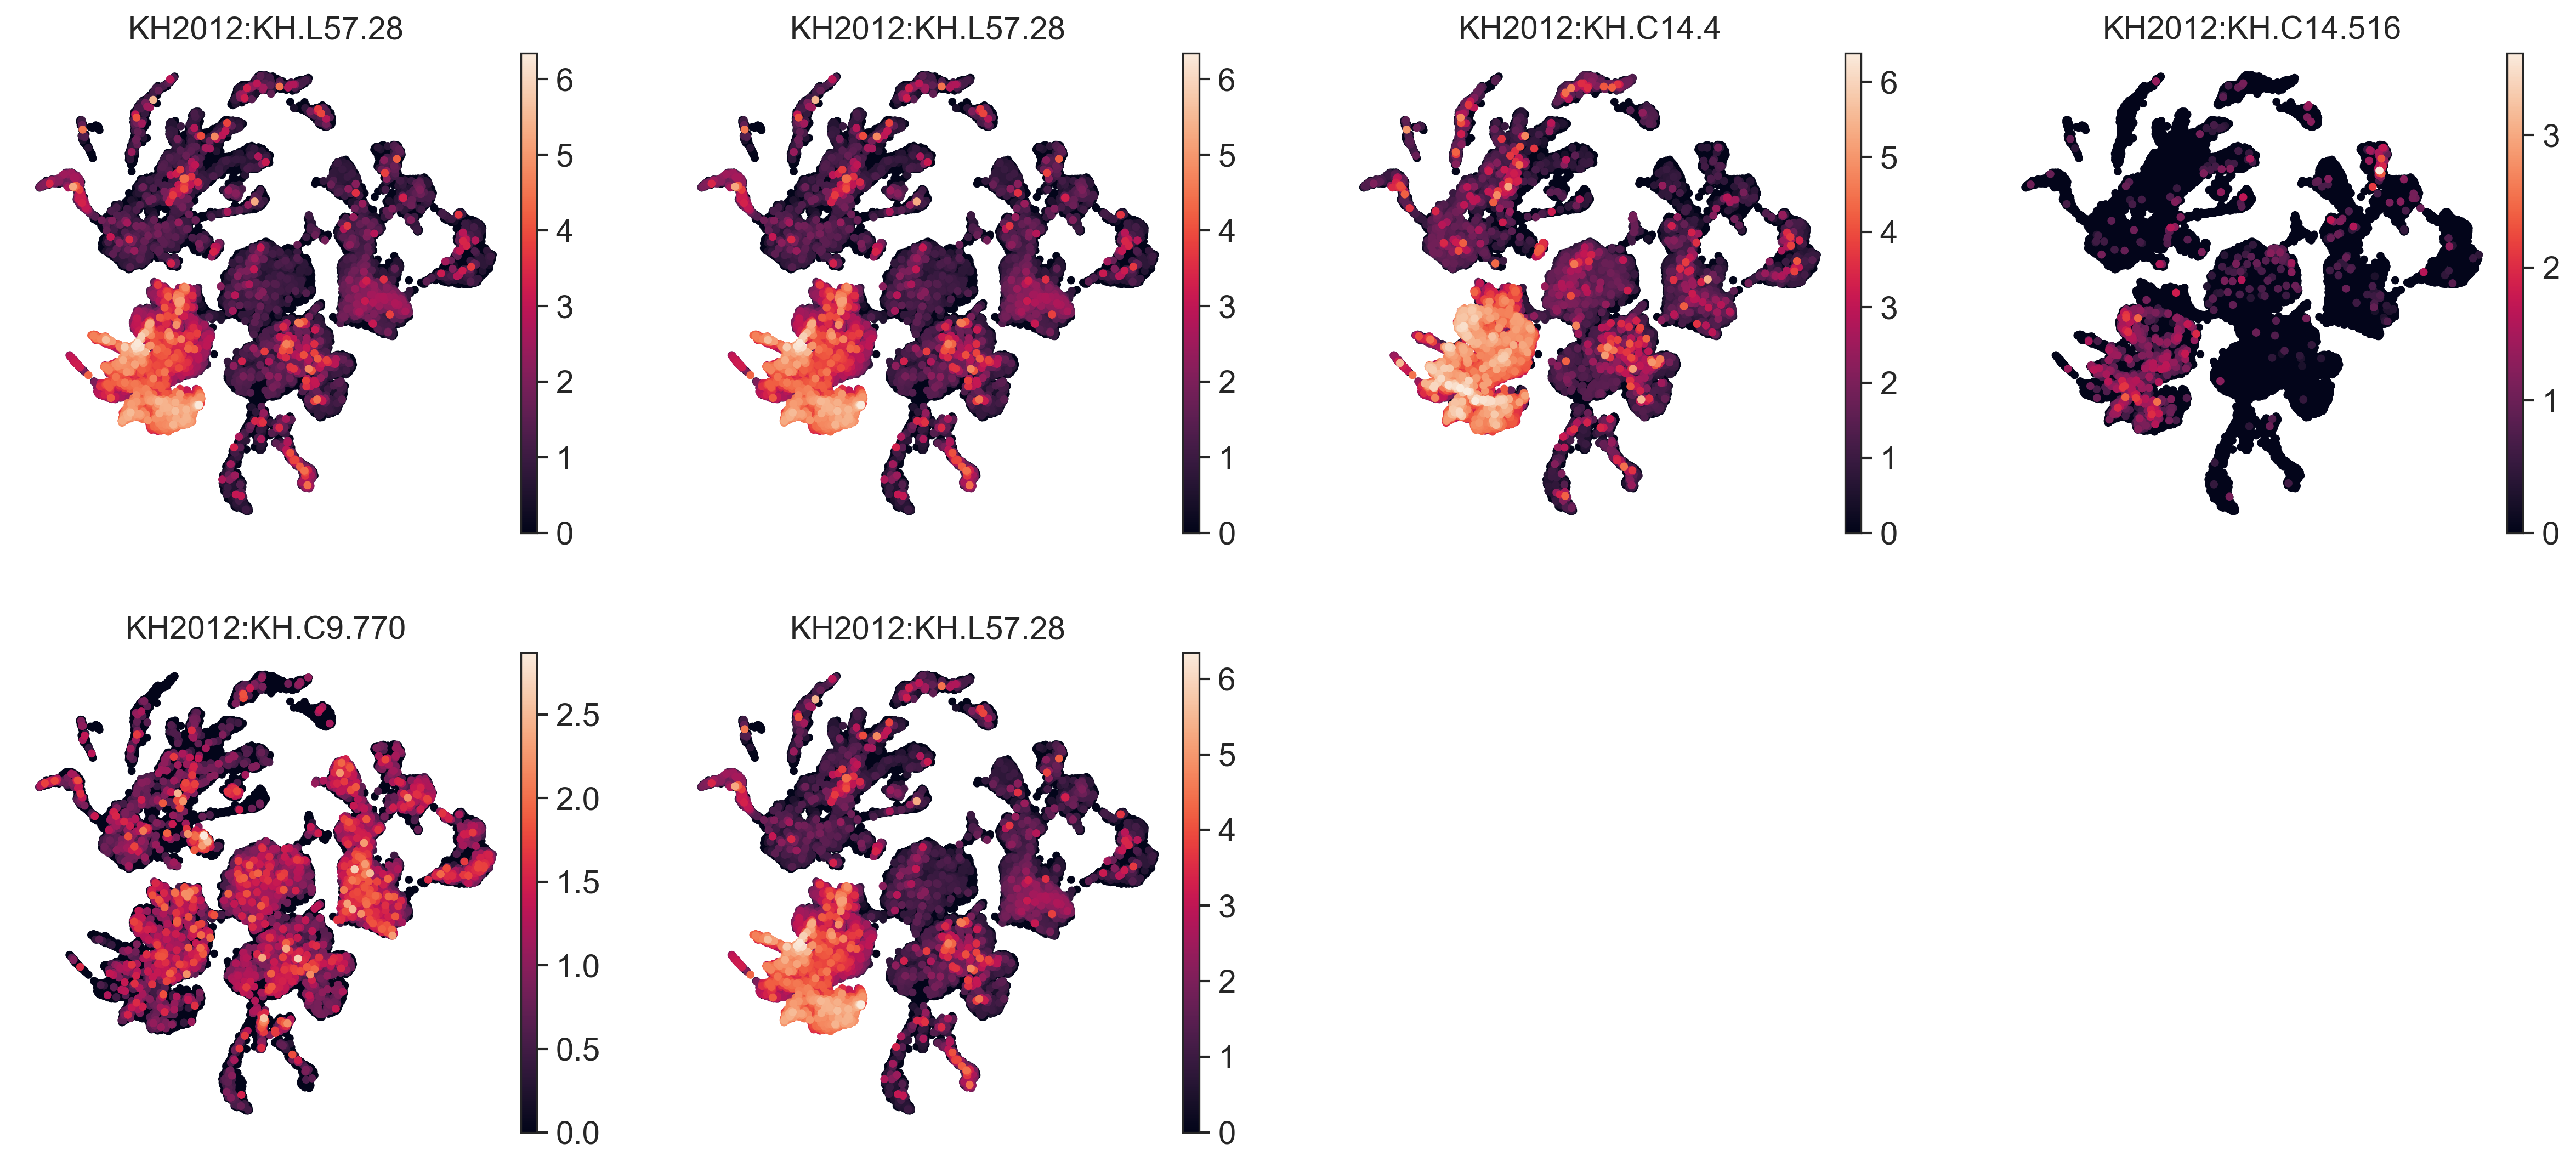

In [ ]:
sc.pl.umap(adata1, color=['KH2012:KH.L57.28','KH2012:KH.L57.28',
                          'KH2012:KH.C14.4', 'KH2012:KH.C14.516' , 'KH2012:KH.C9.770', 'KH2012:KH.L57.28'], frameon=False, size=50, legend_loc='on data')

In [ ]:
adata2=adata1.copy()

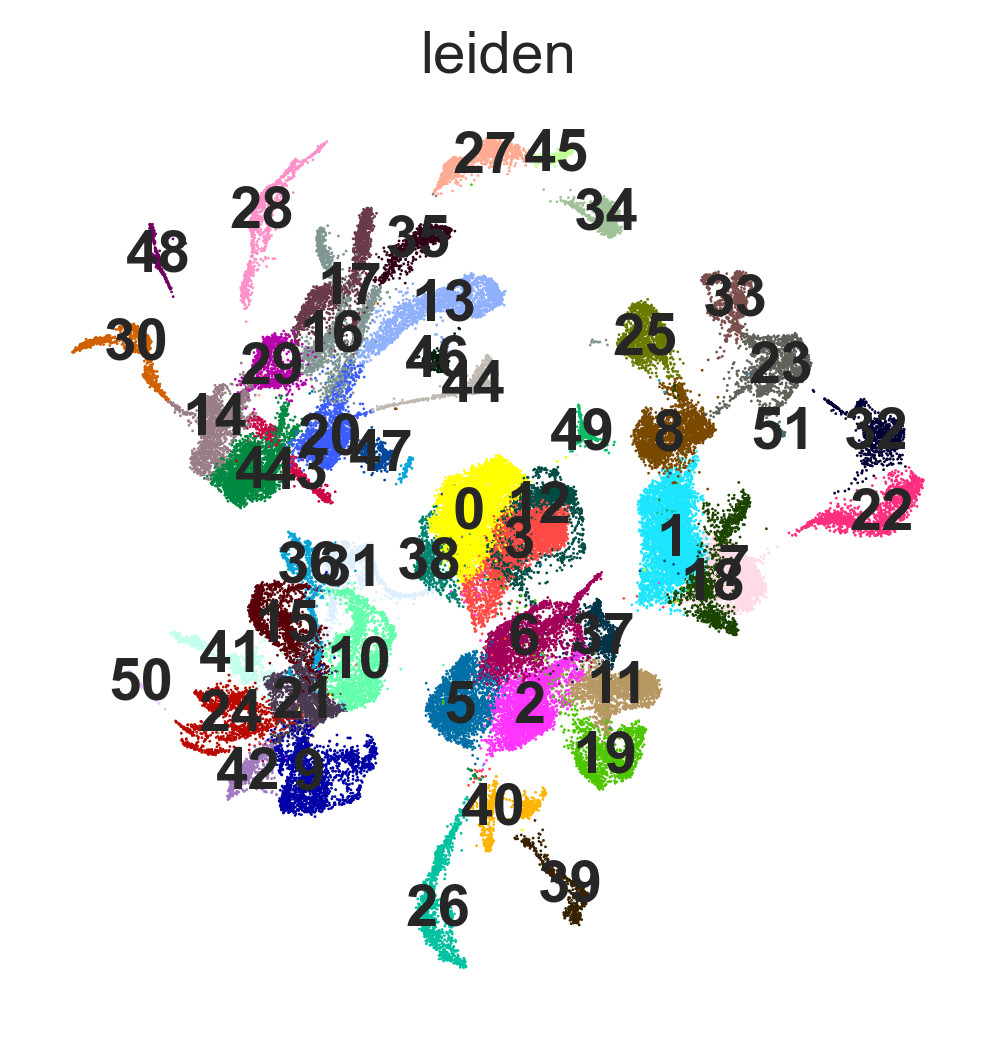

In [ ]:
sc.tl.leiden(adata1, resolution=1.3)
sc.pl.umap(adata1, color=['leiden' ], frameon=False, legend_loc='on data')

In [ ]:
# otp "KH2012:KH.C14.377", "KH2012:KH.C2.526"
#     KH2012:KH.C1.286 = KH.C1.286 GABA  (VGAT),

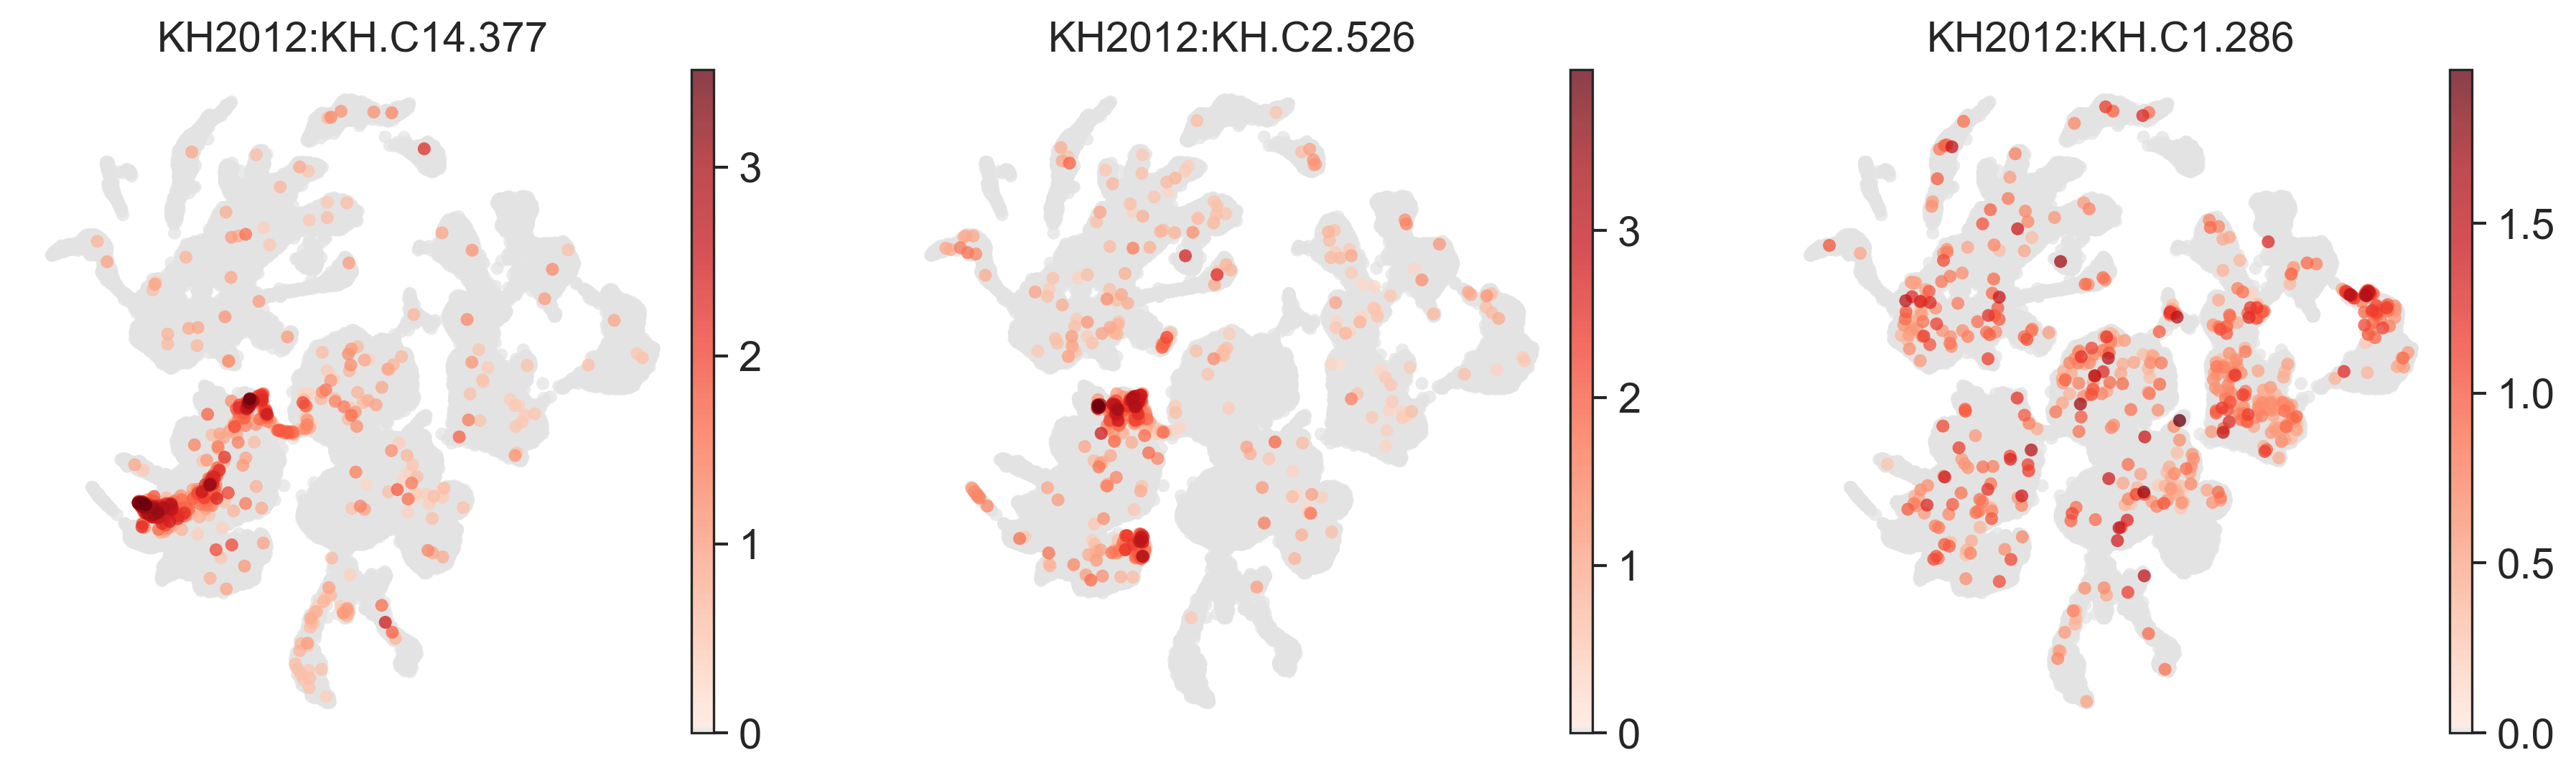

In [ ]:
sc.pl.umap(adata1, color = ["KH2012:KH.C14.377", "KH2012:KH.C2.526", "KH2012:KH.C1.286"], color_map = reds_cmap, frameon = False, size = 75, alpha = .75,
          # save='RRH_.pdf'
          )

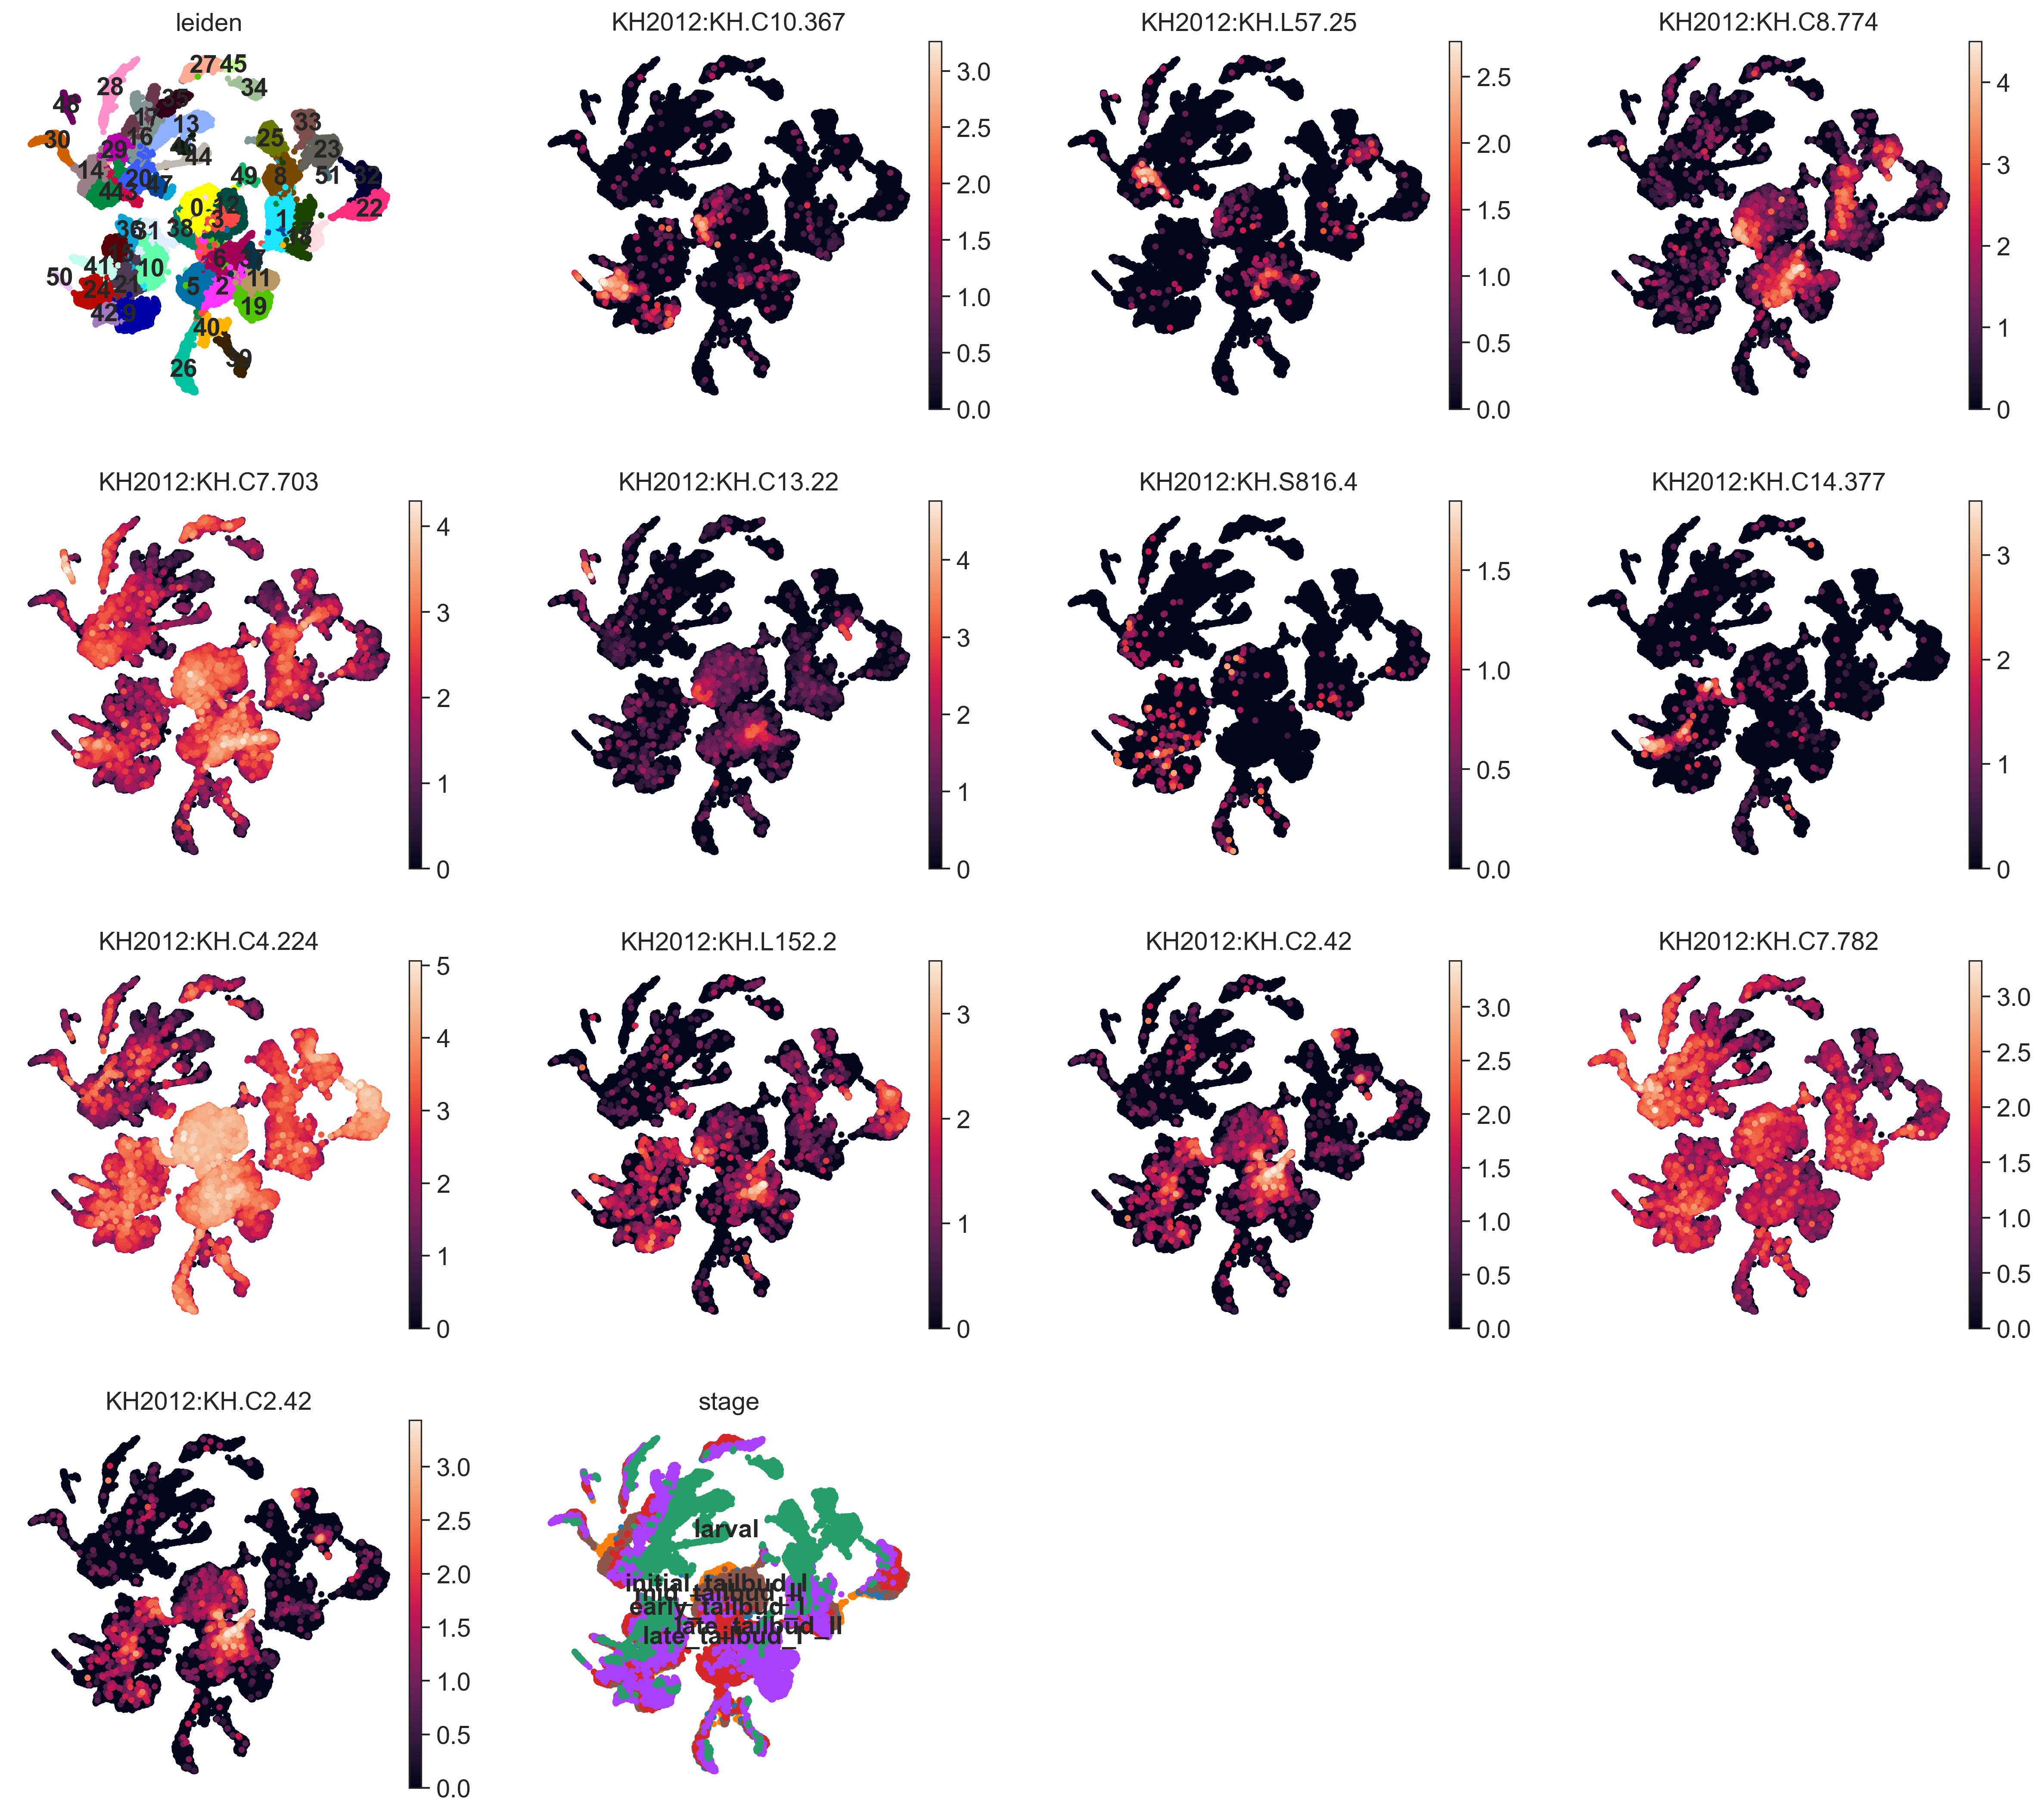

In [ ]:
#KH2012:KH.L57.25	FOXC1 KH2012:KH.C8.774	FOXG1 KH2012:KH.C7.703	EYA1 KH2012:KH.C13.22	SP8 KH2012:KH.S816.4	ZIC3 KH2012:KH.C14.377	OTP
#KH2012:KH.C4.224	BCAM KH2012:KH.L152.2	ISL1 KH2012:KH.C2.42	POU4F1 KH2012:KH.C7.782	POU4F1 KH2012:KH.C2.42	POU4F1

sc.pl.umap(adata1, color=['leiden', 'KH2012:KH.C10.367', 'KH2012:KH.L57.25', 'KH2012:KH.C8.774', 'KH2012:KH.C7.703', 'KH2012:KH.C13.22', 'KH2012:KH.S816.4', 'KH2012:KH.C14.377',
                               'KH2012:KH.C4.224','KH2012:KH.L152.2','KH2012:KH.C2.42','KH2012:KH.C7.782','KH2012:KH.C2.42','stage'], size=50, legend_loc='on data', frameon=False)

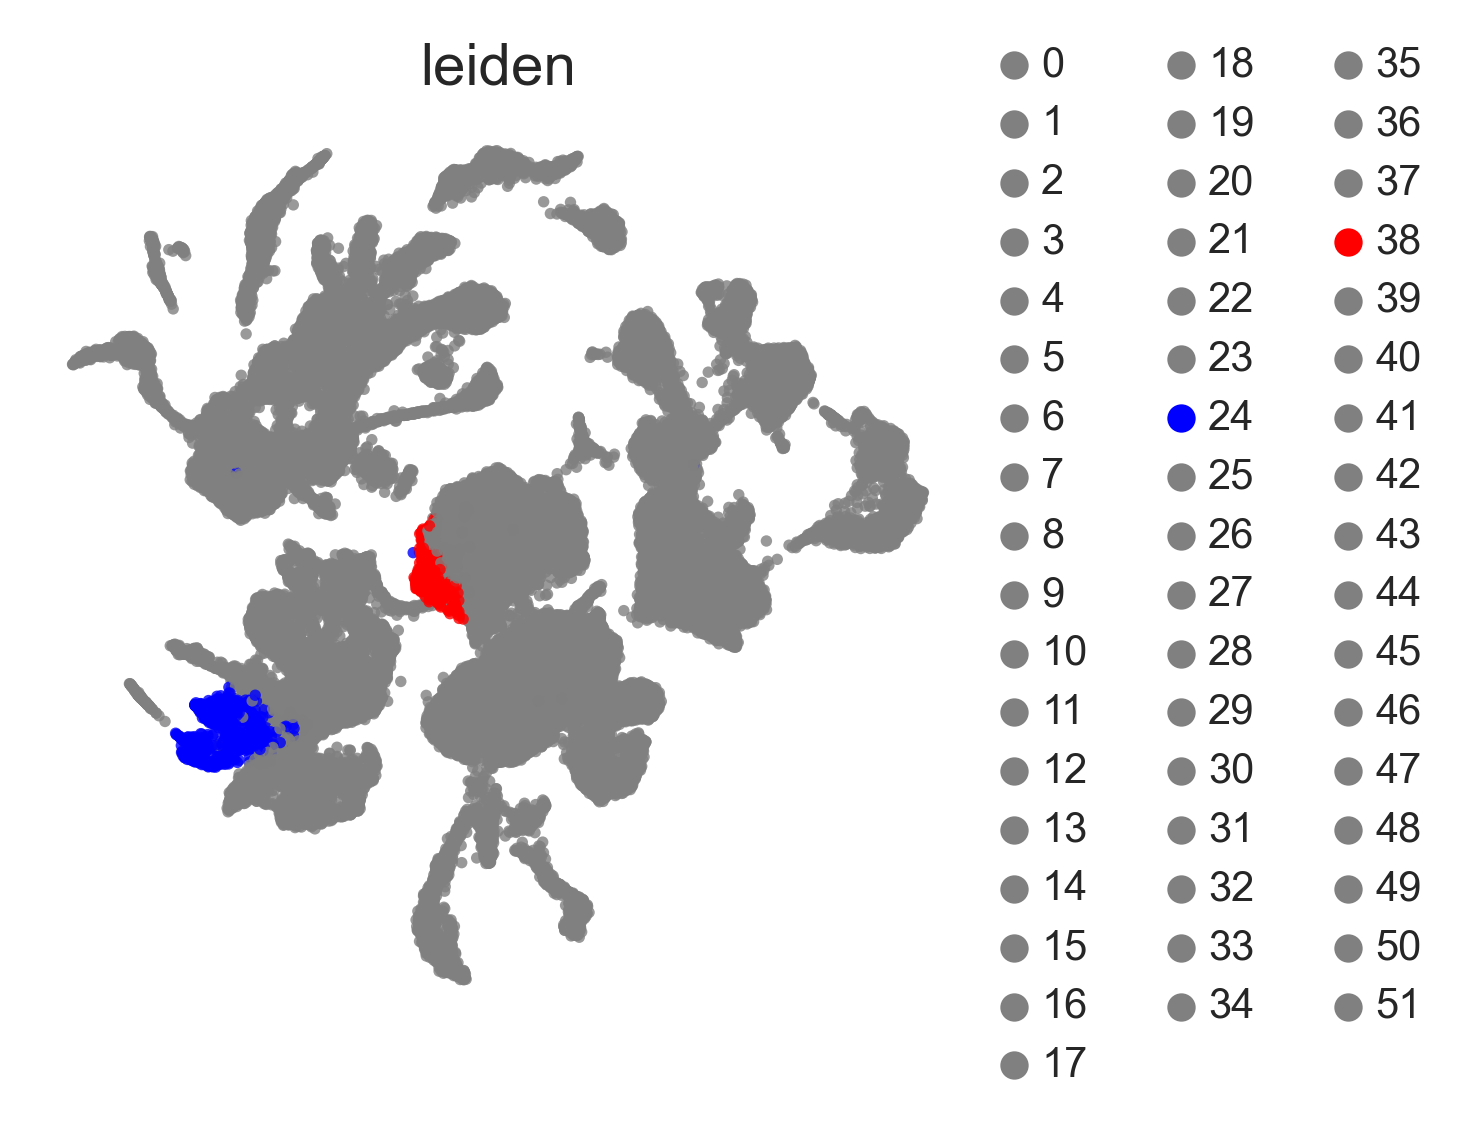

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define the clusters to highlight
highlighted_clusters = {38: 'red', 24: 'blue'}  # Specify cluster numbers and colors
num_clusters = len(adata1.obs['leiden'].unique())  # Total number of clusters

# Create a color array: grey for all clusters initially
colors = ['grey'] * num_clusters

# Assign colors to the highlighted clusters
for cluster, color in highlighted_clusters.items():
    colors[cluster] = color

# Apply the color map to the plot
adata1.uns['leiden_colors'] = colors

# Re-plot
sc.pl.umap(
    adata1,
    color='leiden',
    size=30,
    frameon=False,
    alpha=0.8,
    legend_fontsize=10,
   # save='38_red_24_blue.pdf'
)


In [ ]:
adata_new=adata1[adata1.obs['leiden'].isin(['38'])]

#adata_new=adata_new.raw.to_adata()

In [ ]:
adata_new

View of AnnData object with n_obs × n_vars = 608 × 15094
    obs: 'plate', 'day', 'stage', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'stage_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
sc.pp.normalize_total(adata_new, target_sum=1e4)
sc.pp.log1p(adata_new)
sc.pp.highly_variable_genes(adata_new, layer=None, n_top_genes=3000)

adata_new.raw = adata_new

adata_new = adata_new[:, adata_new.var.highly_variable]
sc.pp.scale(adata_new, max_value=10)
sc.tl.pca(adata_new, svd_solver='arpack')
#sc.pl.pca_variance_ratio(adata_new, log=True)

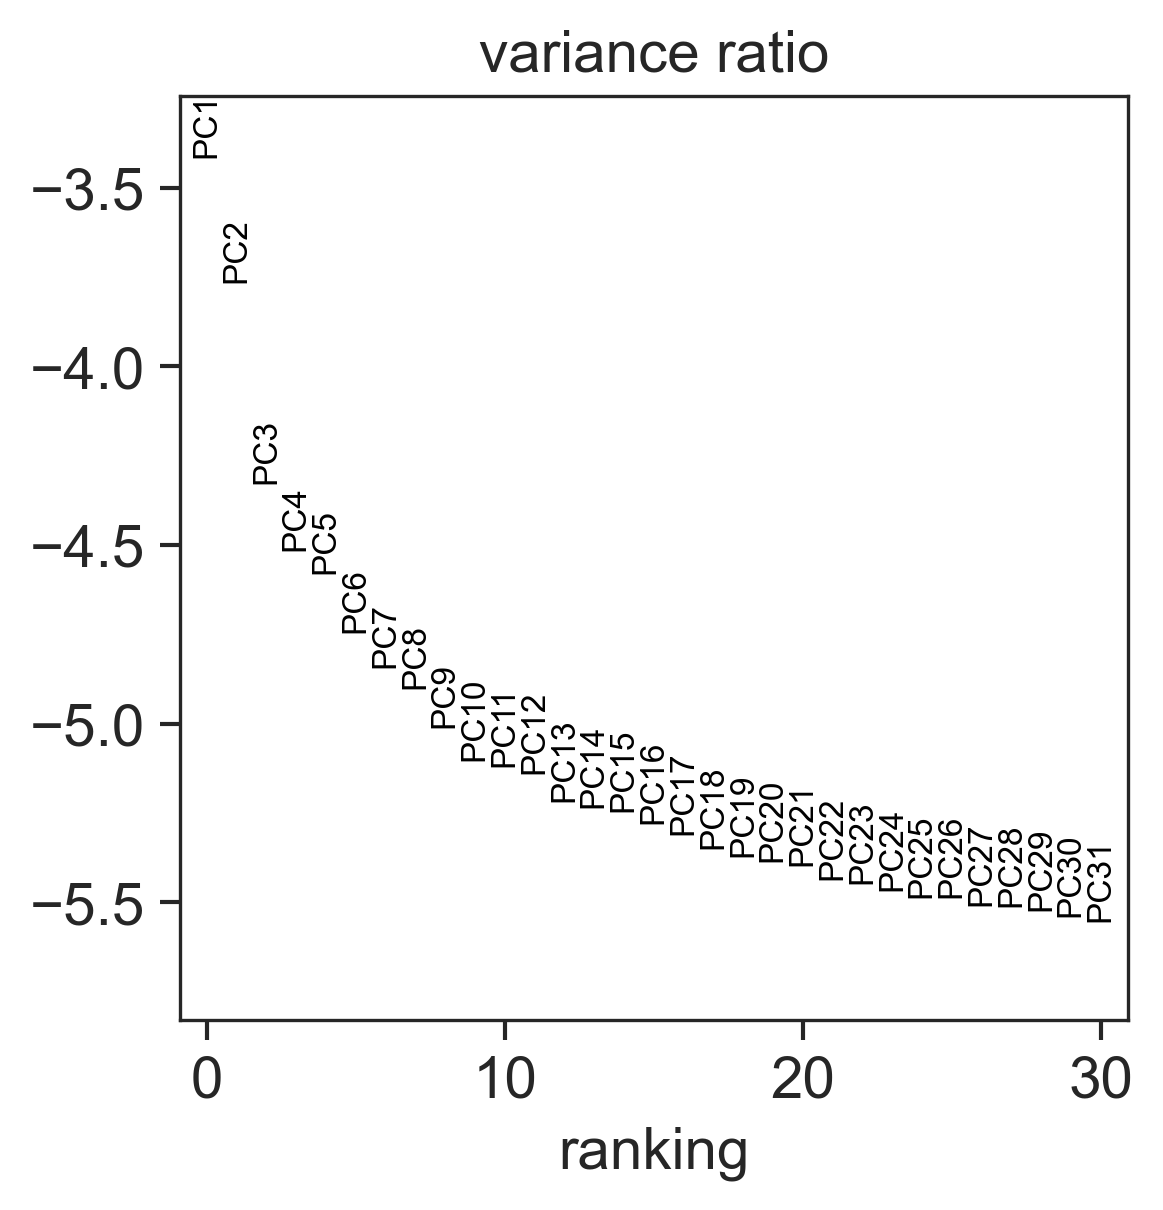

In [ ]:
sc.pl.pca_variance_ratio(adata_new, log=True)

In [ ]:
#adata_new.write('/home/julia/data/placodes/h5ad/7_11_subset_38.h5ad')
